In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set()
#sns.set_context('paper')
from matplotlib_visuals import *

import asg
from utility import *

%matplotlib inline

IP = '192.168.0.117'
maxf = 7629

In [2]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 600

(0, 3000)

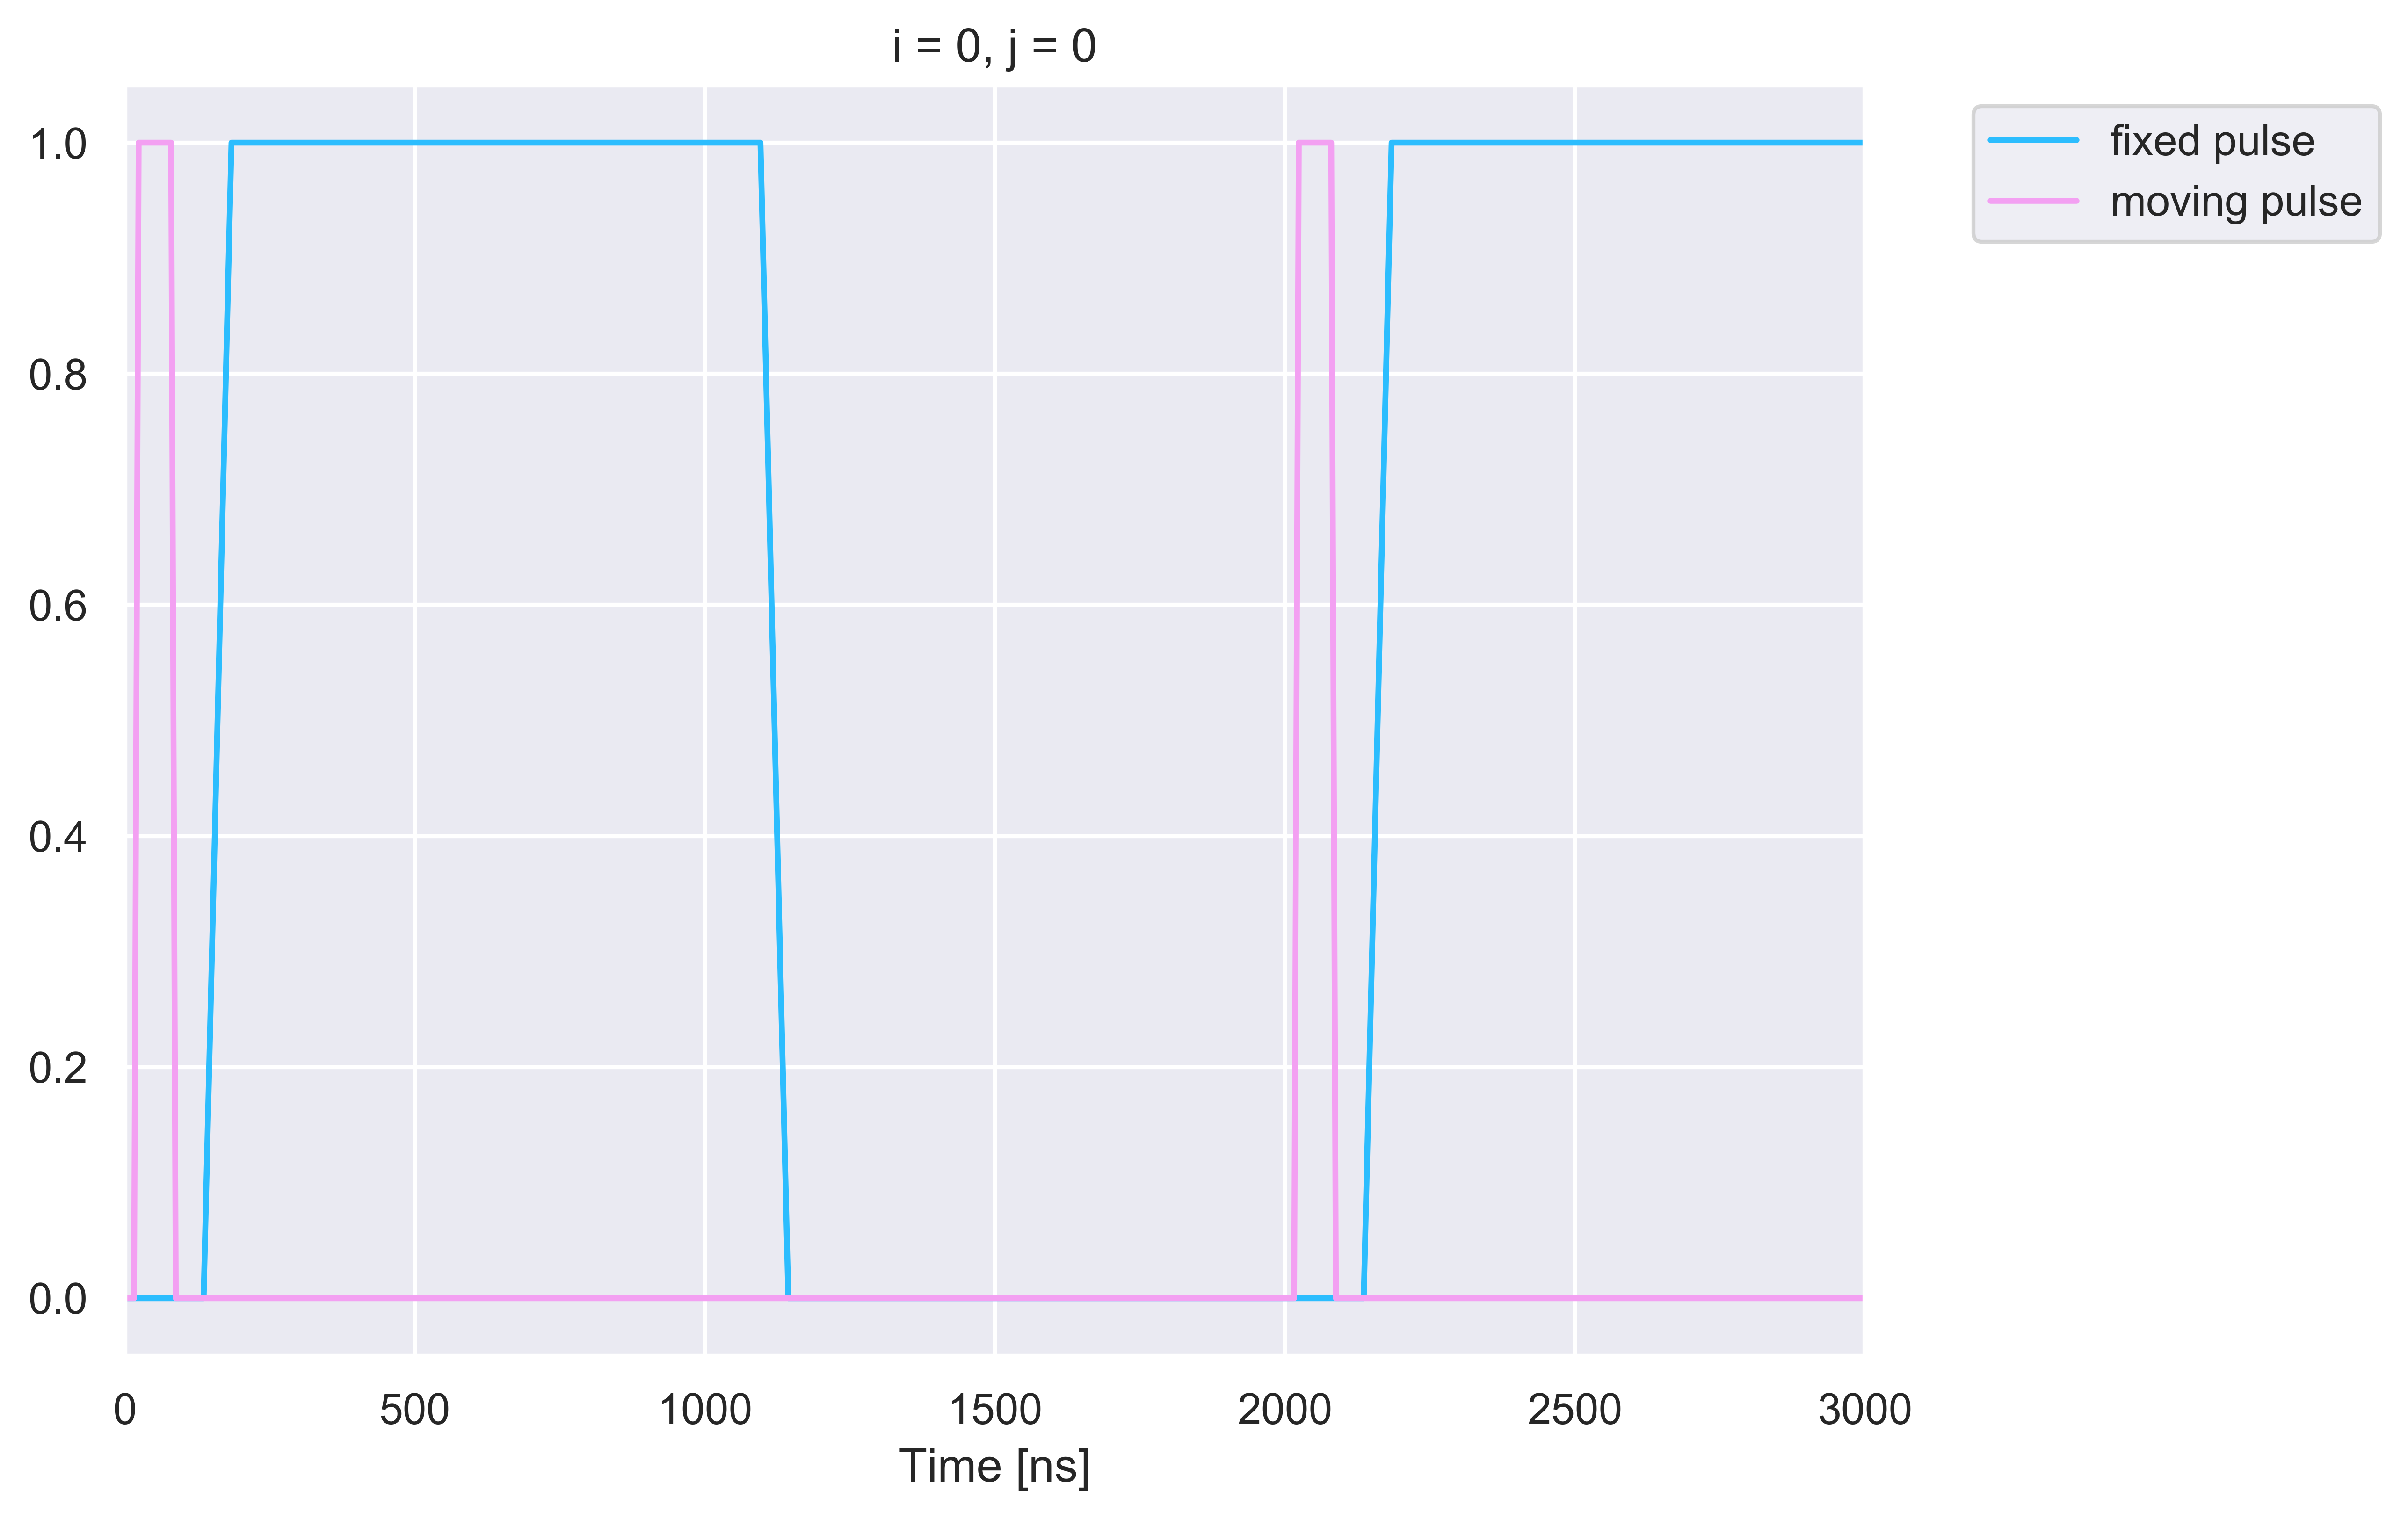

In [11]:
i = 0
j = 0

tr = 2e3
t2 = 1e3
#t1 = 0.083333333333e3 * i
small_delay = 24 * i        # ns
big_delay = 208 * j         # ns

num_p = 64
width = 64 # ns
slope = 0

t = np.linspace(0, 2**14, 2**14)*8
# 0 < t1 < 10*tr, let's say in 20 steps
# t1 = 0, 1e3=t2, 2e3=tr, 3e3, 4e3, ... , 20e3  [ns]

# 2**14 * 8 / 2e3 = 65.536
fixed_pulse = multi_pulse(tr, t2, nr_of_pulses=num_p)
shifted_fixed_pulse = shift_ns(fixed_pulse, 120)
#moving_pulse = shift_ns(fixed_pulse, t1)


moving_pulse = multi_pulse(tr, width, nr_of_pulses=num_p, s_length=slope)
moving_pulse = shift_ns(moving_pulse, small_delay + big_delay)

plt.plot(t, shifted_fixed_pulse, label='fixed pulse')
plt.plot(t, moving_pulse, label='moving pulse')
plt.title(f'i = {i}, j = {j}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Time [ns]')

plt.xlim(left=0, right=3000)

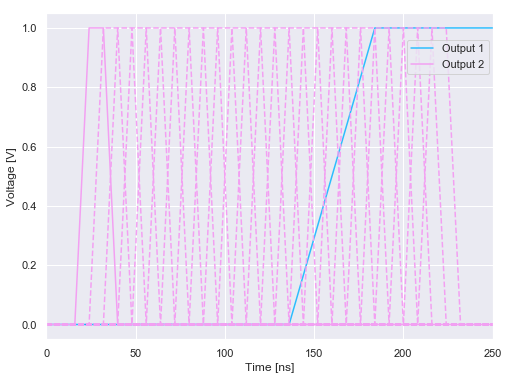

In [23]:
plt.plot(t, shifted_fixed_pulse, label='Output 1')
shift = 8
arrow_pos = 200
height = 0.5
for i in range(25):
    if i > 0:
        plt.plot(t, shift_ns(moving_pulse, shift*(i)), ls='--', color='#F3A0F2')
        #plt.arrow(arrow_pos+shift*(i-1), height, 16, 0, color='#9D2EC5', head_width=0.02, head_length=15)
    else:
        plt.plot(t, shift_ns(moving_pulse, 0), label='Output 2', color='#F3A0F2')
        #plt.arrow(90, 0.5, 16, 0, color='#F3A0F2', head_width=0.02, head_length=18)

plt.xlim(left=0, right=250)
#plt.arrow(arrow_pos, height, 25, 0, color='#9D2EC5', linewidth=3, head_width=0.001, head_length=10, ls=':')
plt.xlabel('Time [ns]')
plt.ylabel('Voltage [V]')
plt.legend(bbox_to_anchor=(0.7955, 0.935), loc='upper left')


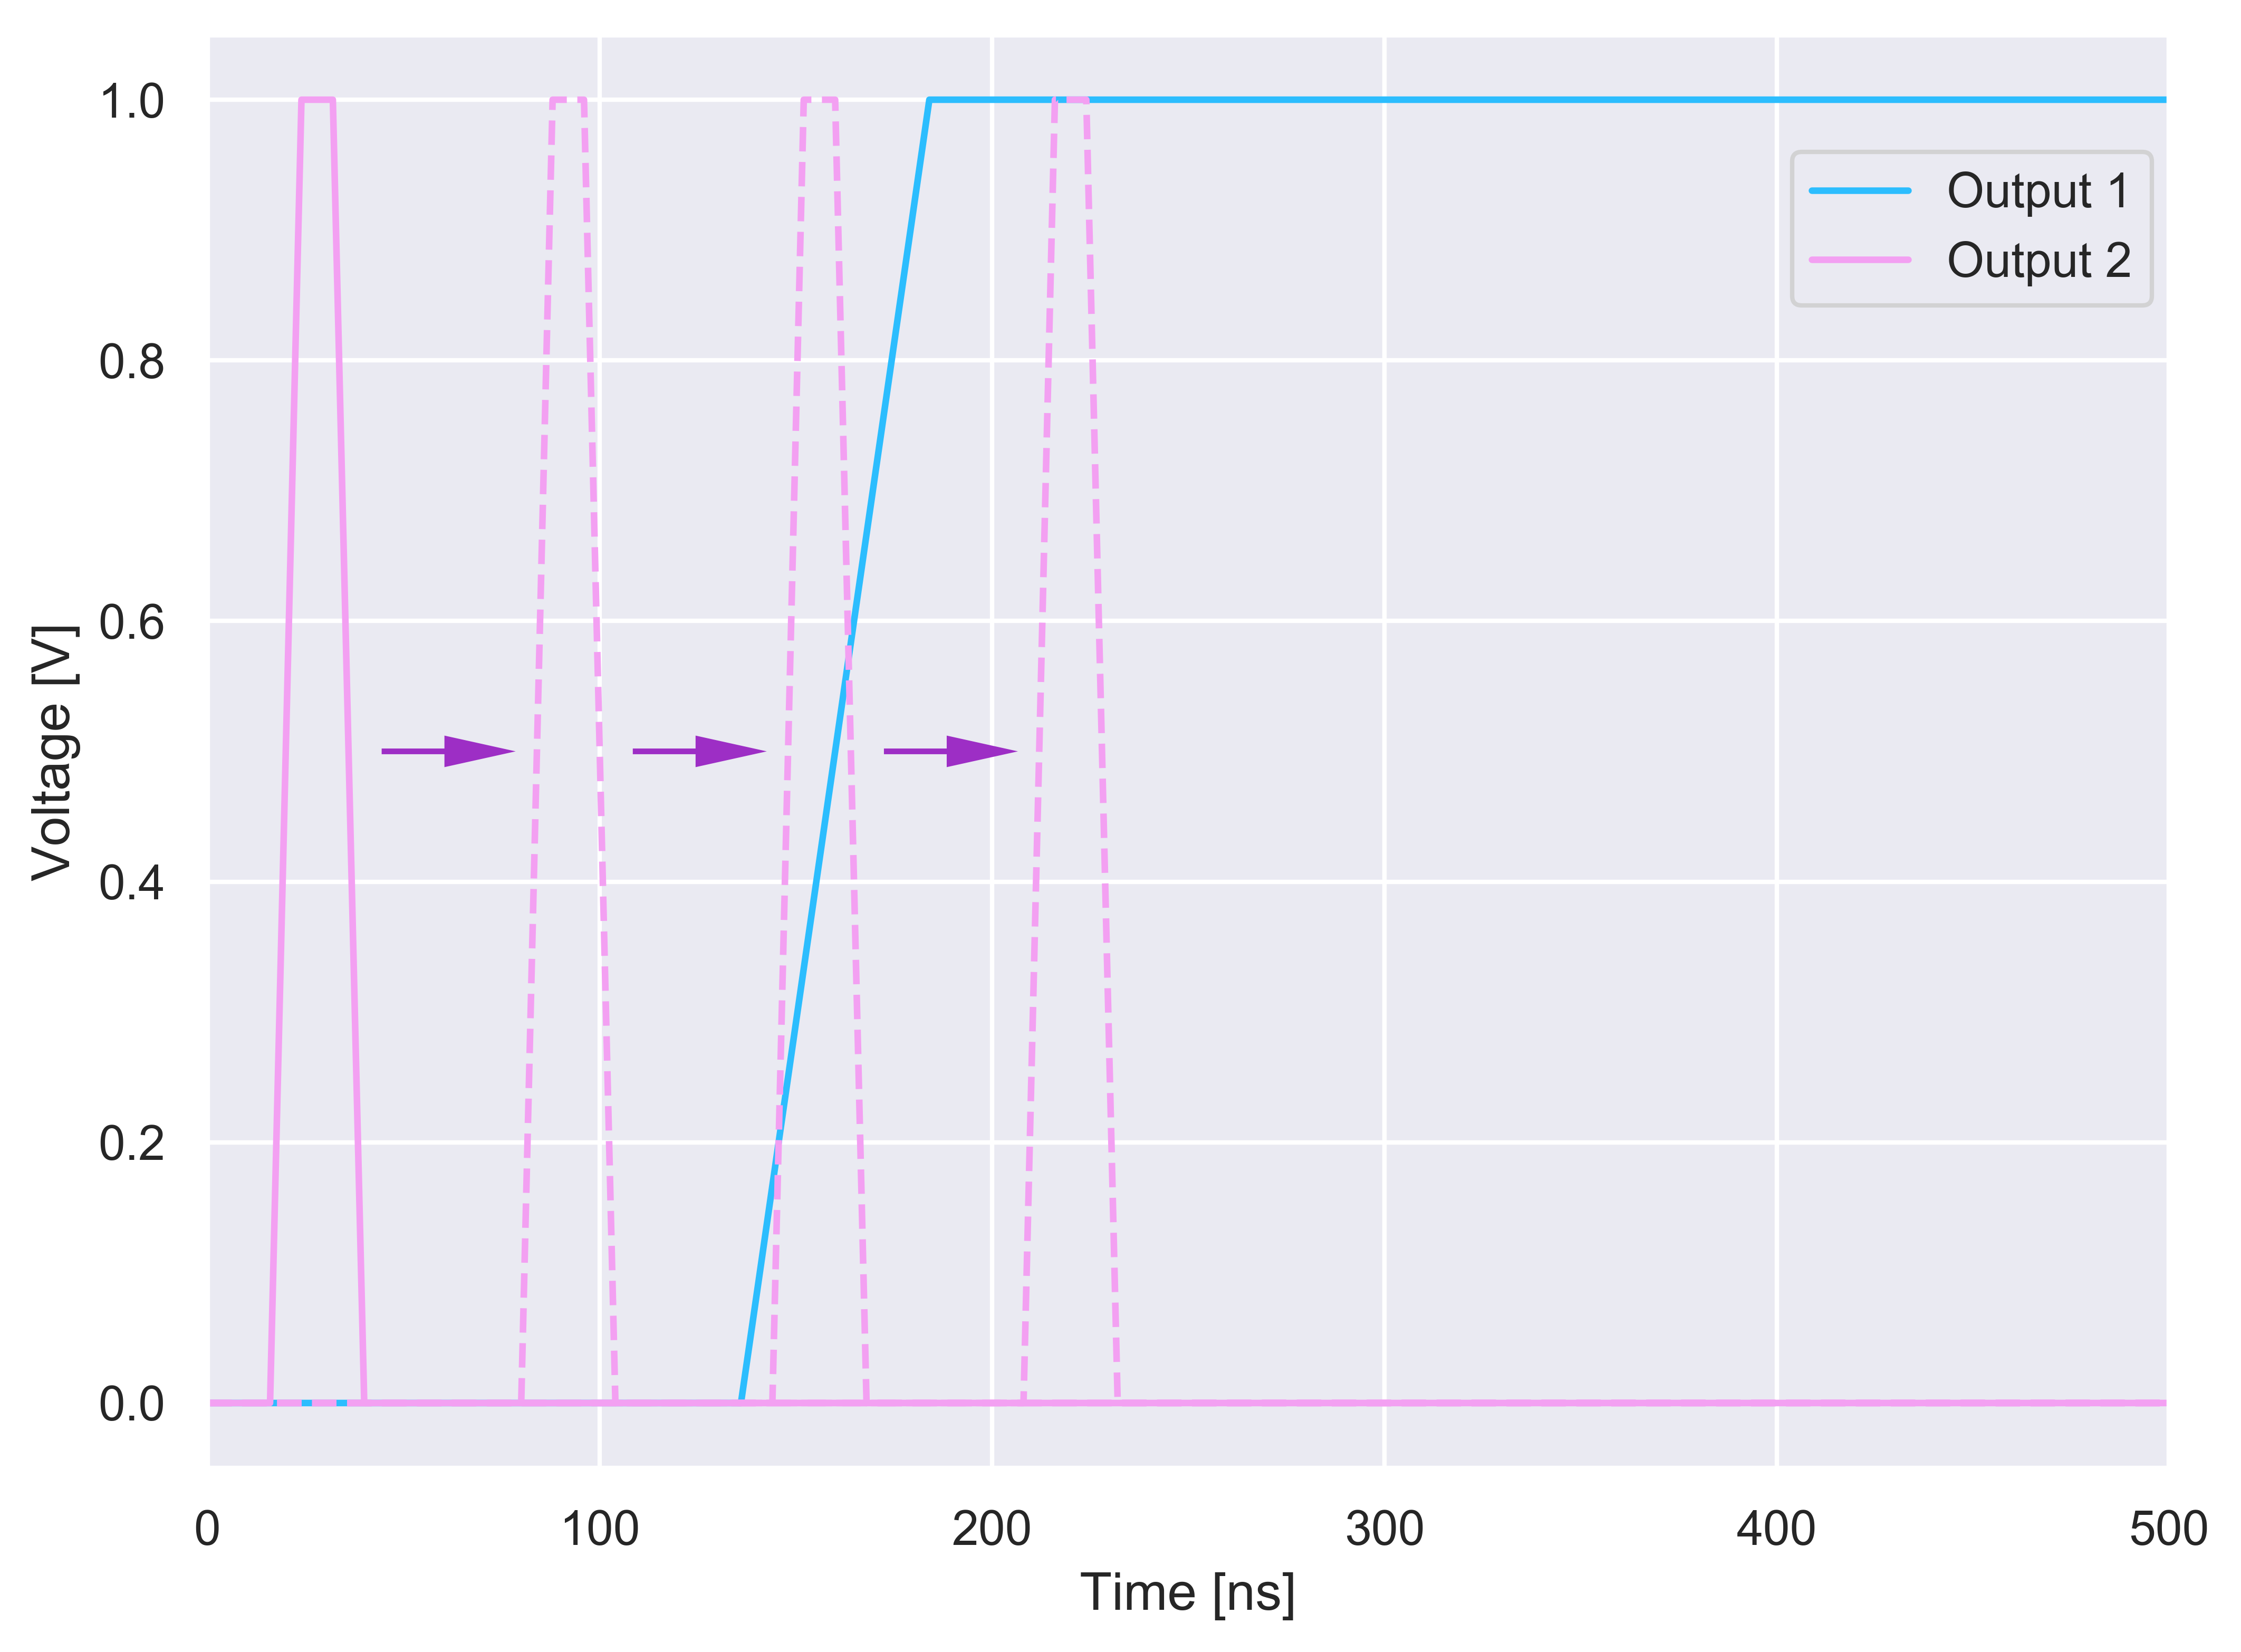

In [9]:
plt.plot(t, shifted_fixed_pulse, label='Output 1', color='#FF0000')
shift = 64
arrow_pos = 45
height = 0.5
for i in range(4):
    if i > 0:
        plt.plot(t, shift_ns(moving_pulse, shift*(i)), ls='--', color='#00B050')
        plt.arrow(arrow_pos+shift*(i-1), height, 16, 0, color='#3399FF', head_width=0.02, head_length=15)
    else:
        plt.plot(t, shift_ns(moving_pulse, 0), label='Output 2', color='#00B050')
        #plt.arrow(90, height, 16, 0, color='#9D2EC5', head_width=0.02, head_length=18)

plt.xlim(left=0, right=500)
#plt.arrow(arrow_pos, height, 25, 0, color='#9D2EC5', linewidth=3, head_width=0.001, head_length=10, ls=':')
plt.xlabel('Time [ns]')
plt.ylabel('Voltage [V]')
plt.legend(bbox_to_anchor=(0.7955, 0.935), loc='upper left')
plt.savefig('600dpi_images/sluice_pulse_expl_16ns_.eps', format='eps')

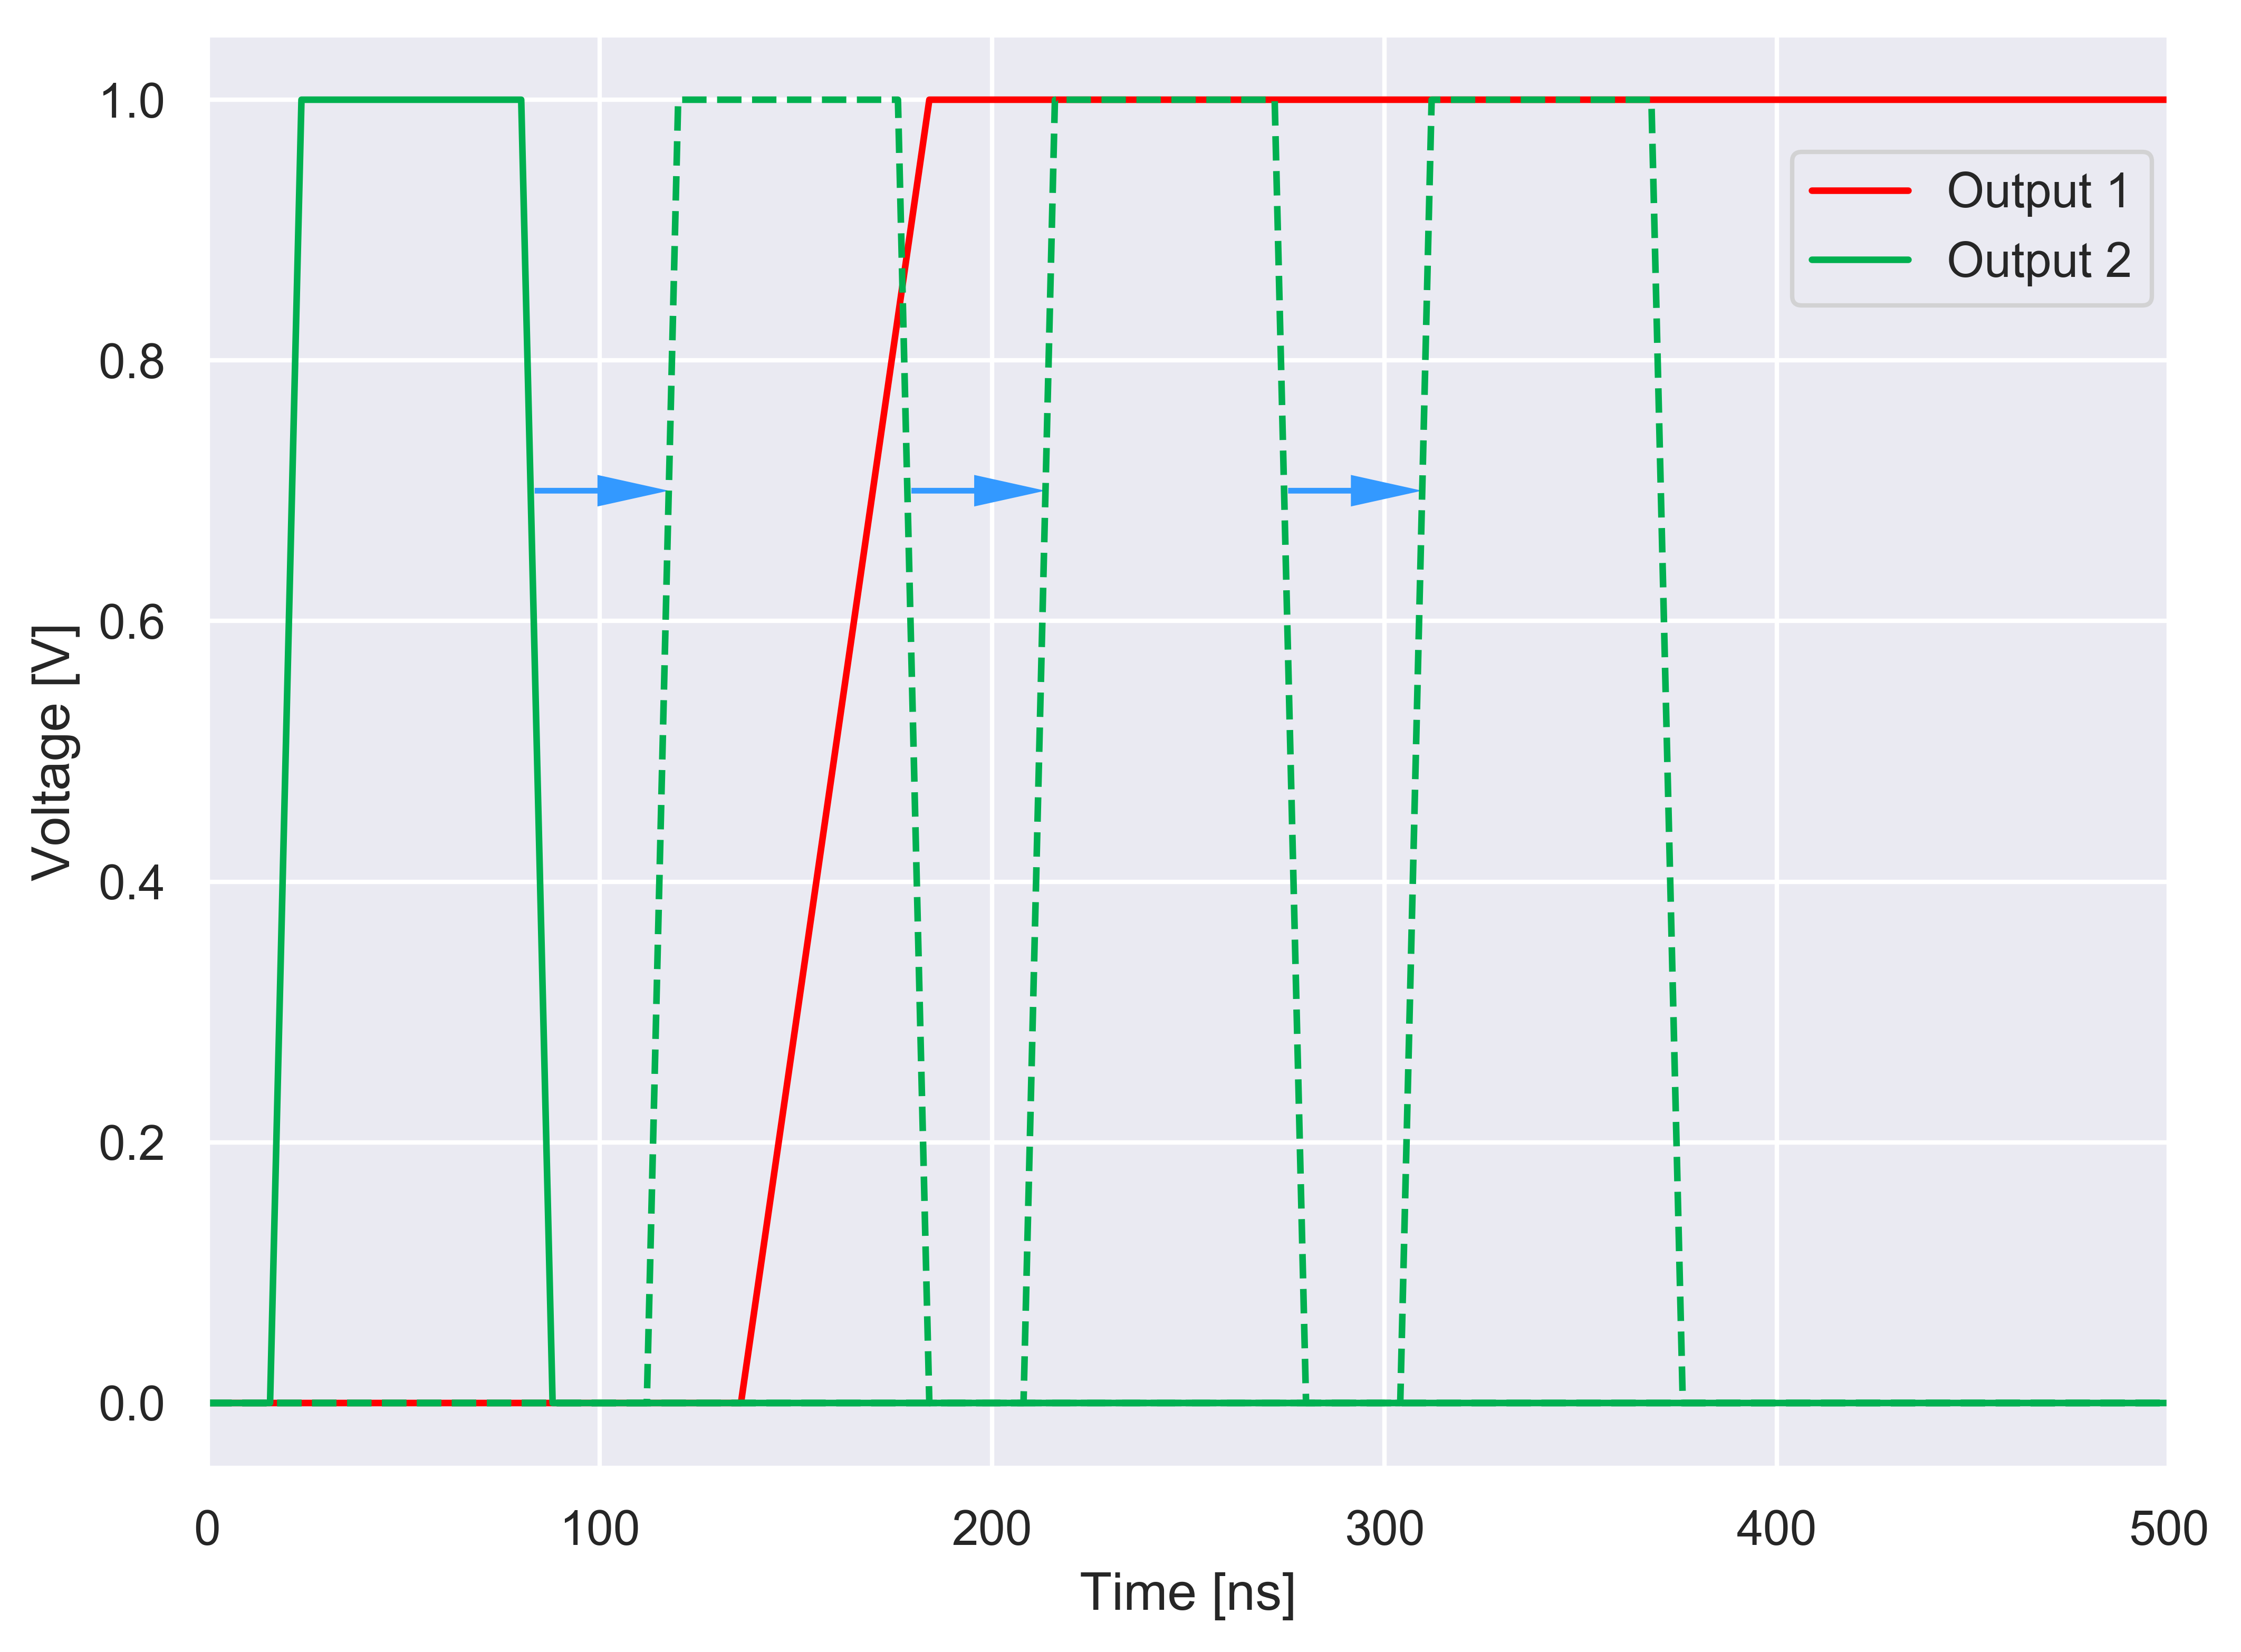

In [13]:
plt.plot(t, shifted_fixed_pulse, label='Output 1', color='#FF0000')
shift = 96
arrow_pos = 84
height = 0.7
for i in range(4):
    if i > 0:
        plt.plot(t, shift_ns(moving_pulse, shift*(i)), ls='--', color='#00B050')
        plt.arrow(arrow_pos+shift*(i-1), height, 16, 0, color='#3399FF', head_width=0.02, head_length=15)
    else:
        plt.plot(t, shift_ns(moving_pulse, 0), label='Output 2', color='#00B050')
        #plt.arrow(90, height, 16, 0, color='#9D2EC5', head_width=0.02, head_length=18)

plt.xlim(left=0, right=500)
#plt.arrow(arrow_pos, height, 25, 0, color='#9D2EC5', linewidth=3, head_width=0.001, head_length=10, ls=':')
plt.xlabel('Time [ns]')
plt.ylabel('Voltage [V]')
plt.legend(bbox_to_anchor=(0.7955, 0.935), loc='upper left')
#plt.savefig('600dpi_images/sluice_pulse_expl_64ns.eps', format='eps')

In [63]:
rp = asg.start(IP)

asg.reset(rp=rp)

asg.setup(rp=rp, output=1, waveform='arbitrary', data=shifted_fixed_pulse, frequency=maxf,
          amplitude=1, burst_mode=True, bursts=1)
asg.setup(rp=rp, output=2, waveform='arbitrary', data=moving_pulse, frequency=maxf, 
          amplitude=1, burst_mode=True, bursts=1)

In [64]:
asg.on(rp=rp, output=1)
asg.on(rp=rp, output=2)

In [66]:
asg.trigger(rp=rp, output='both')

In [67]:
asg.off(rp=rp)

# $t_1$ --> $10\cdot t_r$

In [15]:
n = 61
t2 = 1e3

averages = np.zeros(n)
moving_averages = np.copy(averages)
ax_t1 = np.copy(averages)

for i in range(n):
    filename = 'scope_data/sluis/t1_to_10_tr/NewFile' + str(i) + '.csv'
    
    ch1, ch2, t = csv_to_array(filename, channels=2)
    t = t*1e6
    
    start = int(40e3)
    end = int(100e3)
    moving_start = int(40e3+10e3/60*i)
    averages[i] = np.average(ch2[start:end]/10)
    moving_averages[i] = np.average(ch2[moving_start:end]/10)
    
    t1 = 0.33333333333333e3 * i
    ax_t1[i] = t1/tr
    
    #plt.plot(t, ch2)
    
#plt.xlim(left=40e3, right=100e3)


Text(0.5, 1.0, 'First and last pulse train')

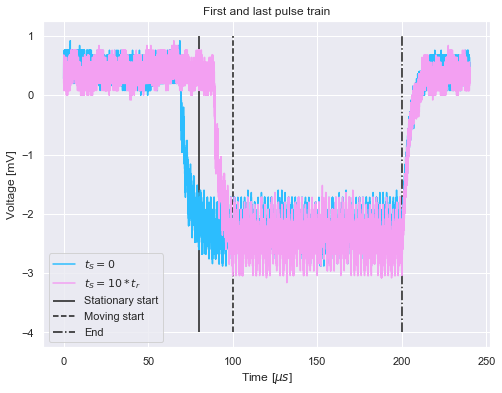

In [25]:
import pylab

filename1 = 'scope_data/sluis/t1_to_10_tr/NewFile' + str(0) + '.csv'
filename2 = 'scope_data/sluis/t1_to_10_tr/NewFile' + str(60) + '.csv'

ch11, ch21, t1 = csv_to_array(filename1, channels=2)
ch12, ch22, t2 = csv_to_array(filename2, channels=2)
t1, t2 = t1*1e6, t2*1e6


plt.plot(t1, ch21*1e3/10, label='$t_S = 0$')
plt.plot(t2, ch22*1e3/10, label='$t_S = 10*t_r$')
plt.vlines(80, -4, 1, label='Stationary start')
plt.vlines(100, -4, 1, label='Moving start', linestyles='dashed')
plt.vlines(200, -4, 1, linestyle='dashdot', label='End')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left')
plt.xlabel('Time [$\mu s$]')
plt.ylabel('Voltage [mV]')
plt.title('First and last pulse train')

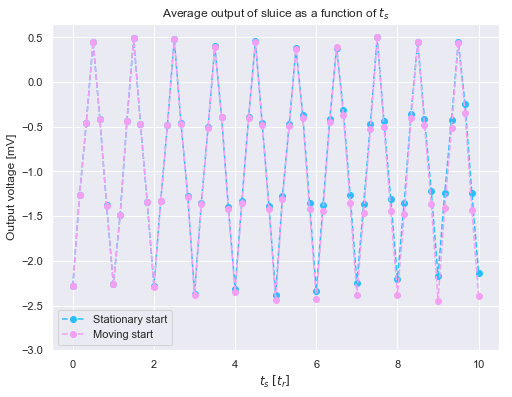

In [28]:

plt.plot(ax_t1, averages*1e3, ls='--', marker='o', label='Stationary start')
plt.plot(ax_t1, moving_averages*1e3, ls='--', marker='o', label='Moving start')
plt.xlabel('$t_s$ $[t_r]$ ')
plt.ylabel('Output voltage [mV]')
plt.title('Average output of sluice as a function of $t_s$')
plt.ylim(bottom=-3)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(bbox_to_anchor=(0, 0), loc='lower left')

# $t_2$ = $t_r$/10

In [480]:
n = 13
tr = 2e3
t2 = tr/10

averages = np.zeros(n)
moving_averages = np.copy(averages)
ax_t1 = np.copy(averages)

for i in range(n):
    filename = 'scope_data/sluis/t2_tr_div_10/NewFile' + str(i) + '.csv'
    
    ch1, ch2, t = csv_to_array(filename, channels=2)
    t = t*1e6
    
    start = int(40e3)
    end = int(100e3)
    moving_start = int(40e3+10e3/60*i)
    averages[i] = np.average(ch2[start:end]/10)
    moving_averages[i] = np.average(ch2[moving_start:end]/10)
    
    t1 = 0.33333333333333e3 * i
    ax_t1[i] = t1/tr

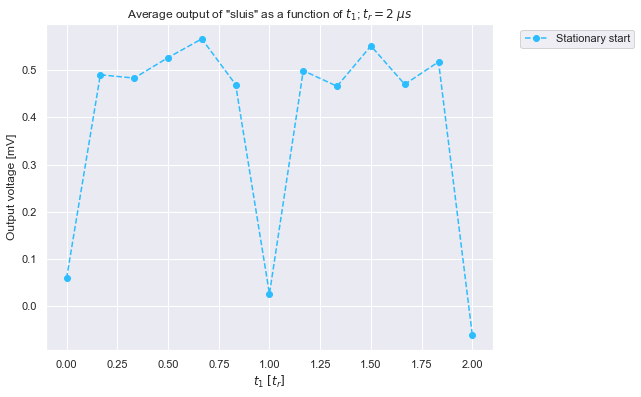

In [484]:
plt.plot(ax_t1, averages*1e3, ls='--', marker='o', label='Stationary start')
plt.xlabel('$t_1$ $[t_r]$ ')
plt.ylabel('Output voltage [mV]')
plt.title('Average output of "sluis" as a function of $t_1$; $t_r = 2$ $\mu s$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pulse 1: $t_2$ $= 1 \mu s$ & pulse 2: $104 ns$ width

- f'ed up the delays etc with rounding..

In [138]:
n = 16
tr = 2e3
t2 = 104

averages = np.zeros(n)
moving_averages = np.copy(averages)
ax_t1 = np.copy(averages)

for i in range(n):
    if i == 6:
        continue
    filename = 'scope_data/sluis/shifting_pulse_100_ns_stat_pulse_1e3_ns/NewFile' + str(i) + '.csv'
    
    ch1, ch2, t = csv_to_array(filename, channels=2)
    t = t*1e6
    
    start = int(40e3)
    end = int(100e3)
    averages[i] = np.average(ch2[start:end]/10)
    
    t1 = 0.083333333333e3 * i
    ax_t1[i] = t1/tr
    

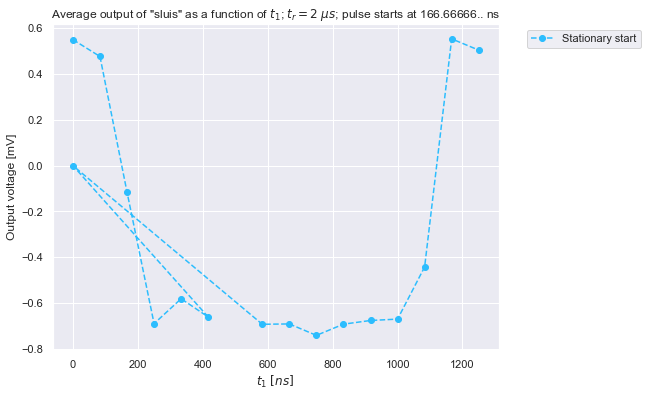

In [145]:
plt.plot(ax_t1*tr, averages*1e3, ls='--', marker='o', label='Stationary start')
plt.xlabel('$t_1$ $[ns]$ ')
plt.ylabel('Output voltage [mV]')
plt.title('Average output of "sluis" as a function of $t_1$; $t_r = 2$ $\mu s$; pulse starts at 166.66666.. ns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pulse 1: $t_2$ $= 1 \mu s$ & pulse 2: $48 ns$ width

- shift big pulse = 56 ns
- small delay = 16 ns
- big delay = 208 ns

In [46]:
n = 20
tr = 2e3
t2 = 48

averages = np.zeros(n)
ax_t1 = np.copy(averages)

start = int(42e3)
end = int(97e3)
j = 0 

for i in range(n):
    
    if 7 < i < 12:
        j = j + 1
        i = 7
    elif i >= 12:
        i = i - 4
    #print(f'i = {i} , j = {j}')
    
    filename = 'scope_data/sluis/sp_48ns_step_16ns/NewFile' + str(i + j) + '.csv'
    small_delay = 16 * i        # ns
    big_delay = 208 * j 
    ch1, ch2, t = csv_to_array(filename, channels=2)
    t = t*1e6
    
    averages[i + j] = np.average(ch2[start:end]/10)
    t1 = small_delay + big_delay
    
    ax_t1[i + j] = t1/tr
    
    #plt.plot(ch2)
        
#plt.xlim(left=42e3, right=97e3) 

20 20


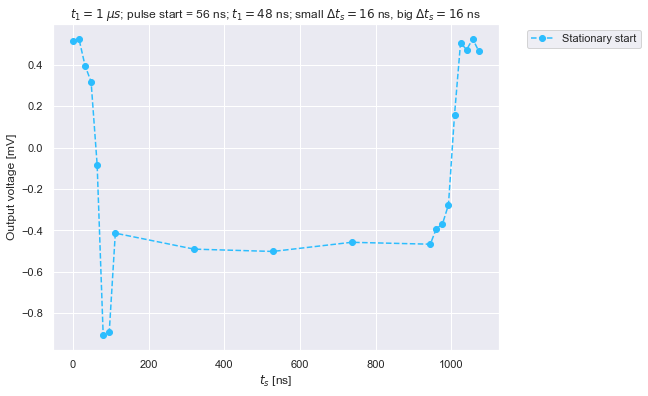

In [53]:
print(ax_t1.size, averages.size)

plt.plot(ax_t1*tr, averages*1e3, ls='--', marker='o', label='Stationary start')
plt.xlabel('$t_s$ [ns] ')
plt.ylabel('Output voltage [mV]')
plt.title('$t_1 = 1$ $\mu s$; pulse start = 56 ns; $t_1 = 48$ ns; small $\Delta t_s = 16$ ns, big $\Delta t_s = 16$ ns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# small pulse width = 16 ns, step size = 8 ns

- small delay = 8 ns
- shift big pulse = 120 ns

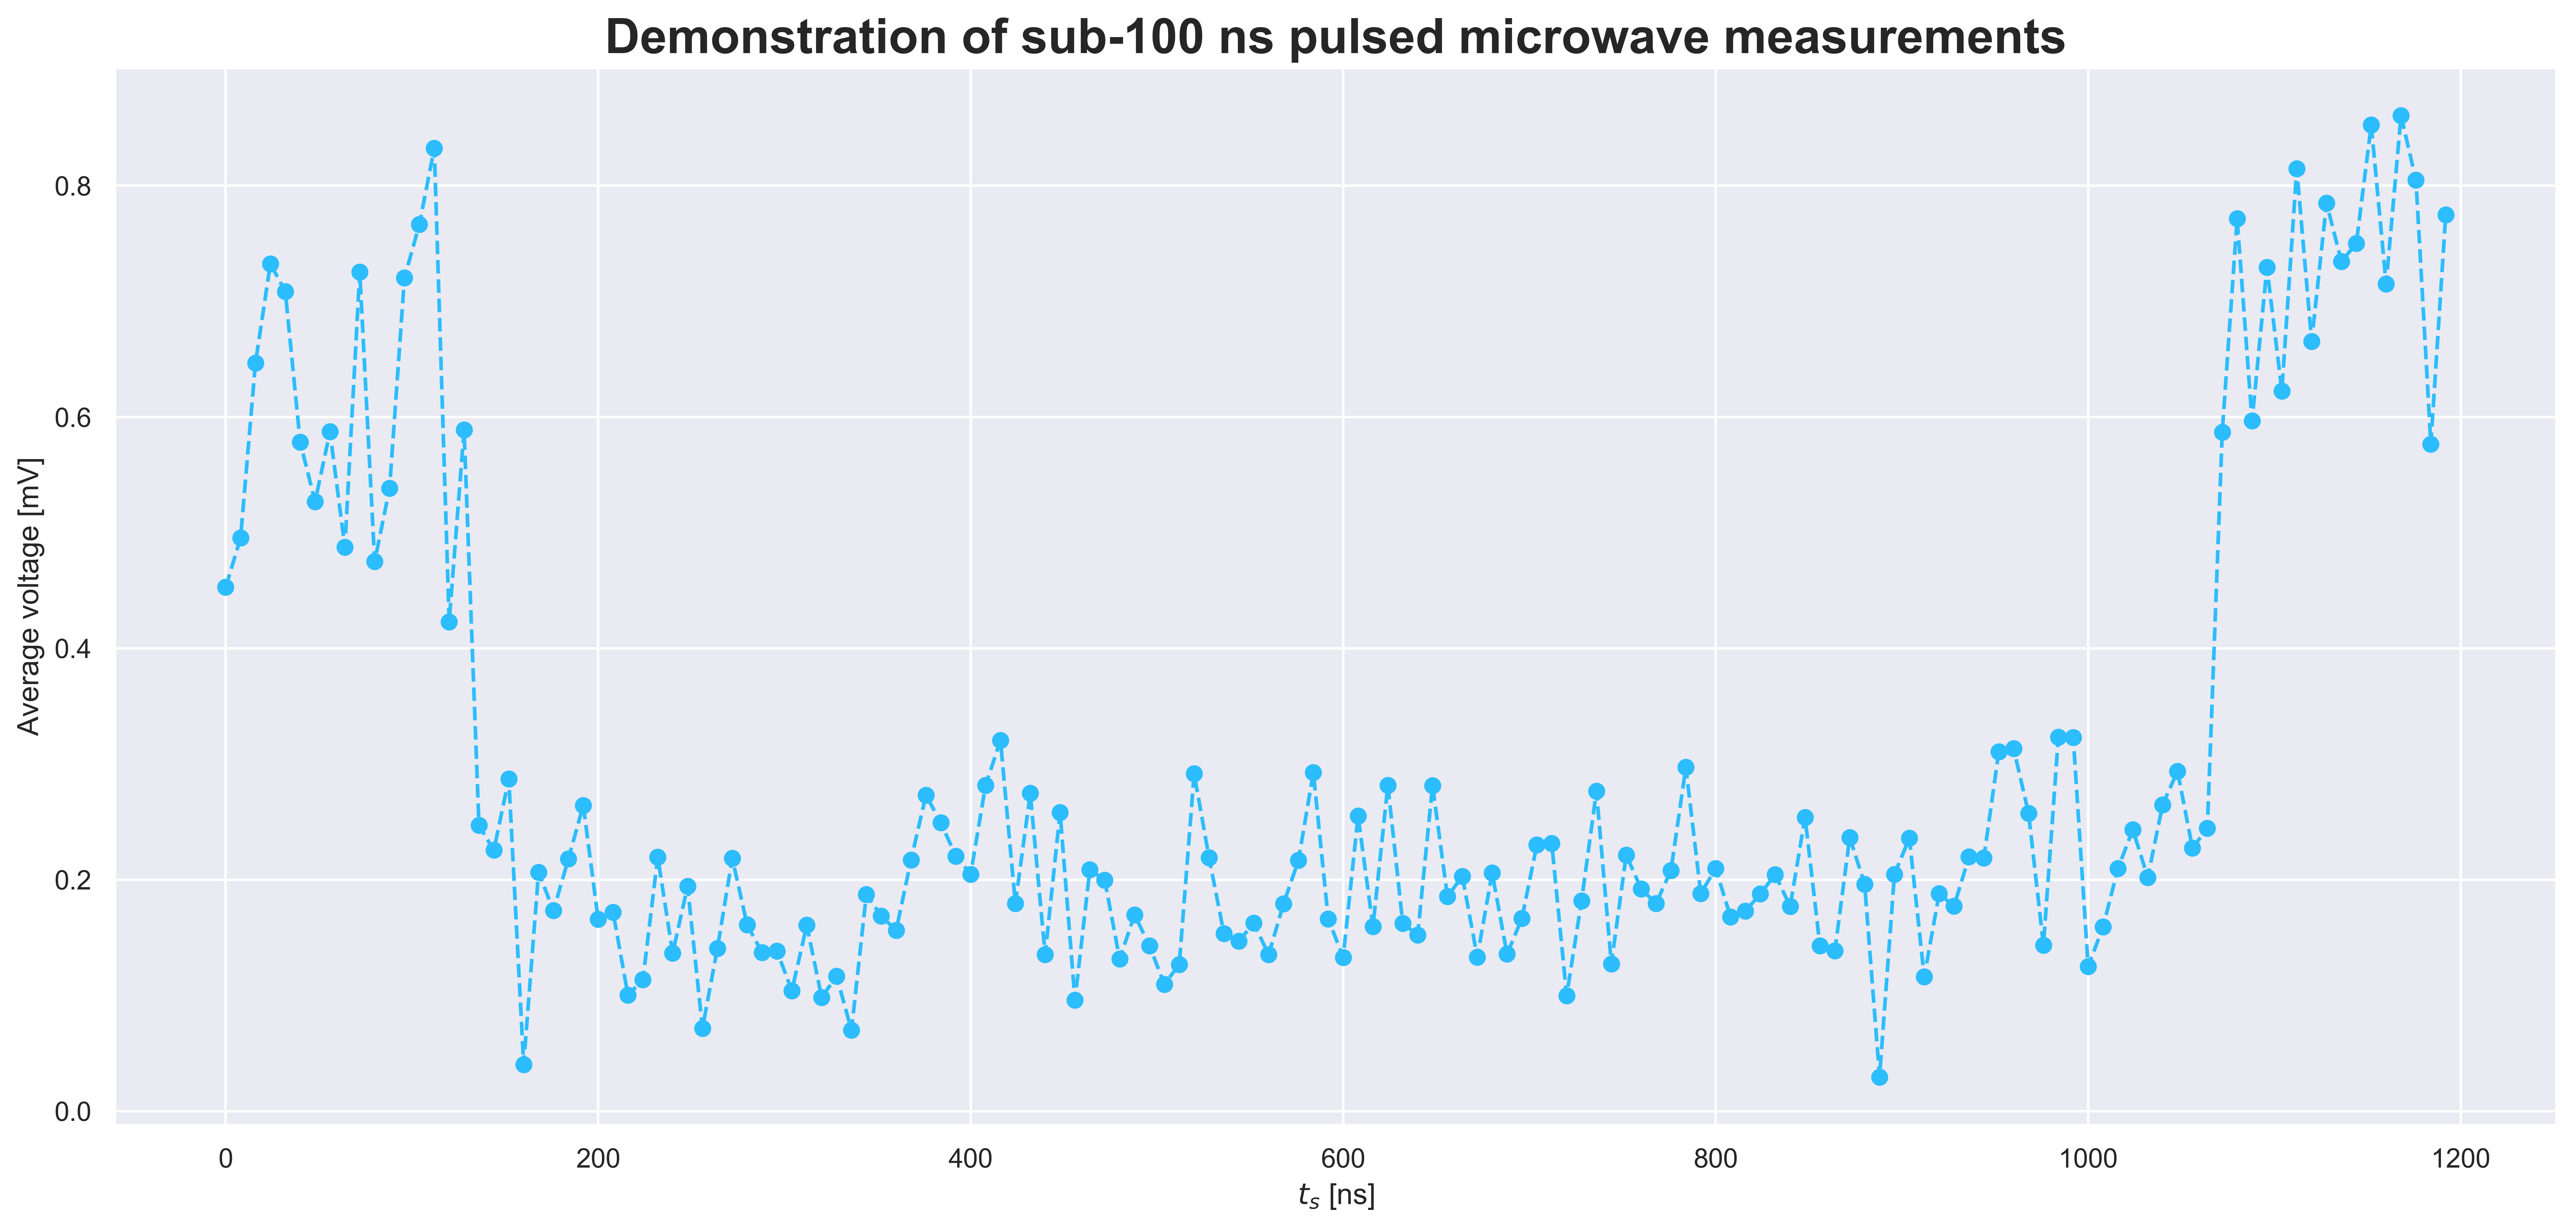

In [48]:
plt.figure(figsize=(18,8), dpi=600)
n = 150

avg = np.zeros(n)
t = np.arange(0, n*8, 8)

for i in range(n):
    filename = 'scope_data/sluis/high_res_acquisition_using_RP/16ns_step_8ns/RP_sweep_16ns_step_8ns' + str(i) + '.npy'
    data = np.load(filename)
    avg[i] = np.average(data)
    
plt.plot(t, avg*1e3, marker='o', ls='--')
plt.xlabel('$t_s$ [ns]')
plt.ylabel('Average voltage [mV]')
plt.title('Demonstration of sub-100 ns pulsed microwave measurements', fontweight='bold', fontsize=20)
#plt.vlines(120, ymin=-0.0009, ymax=0, linestyles='dashed', lw=0.75, label='120 ns')
#plt.vlines(160, ymin=-0.0009, ymax=0, linestyles='dashed', lw=0.75, label='160 ns')
#plt.xlim(0, 250)#; plt.ylim(bottom=-0.0009)
#plt.legend()
plt.savefig('600dpi_images/1us_swept_w_16ns_step_8ns_in_zoom_600dpi_wide.eps', dpi=600, format='eps')

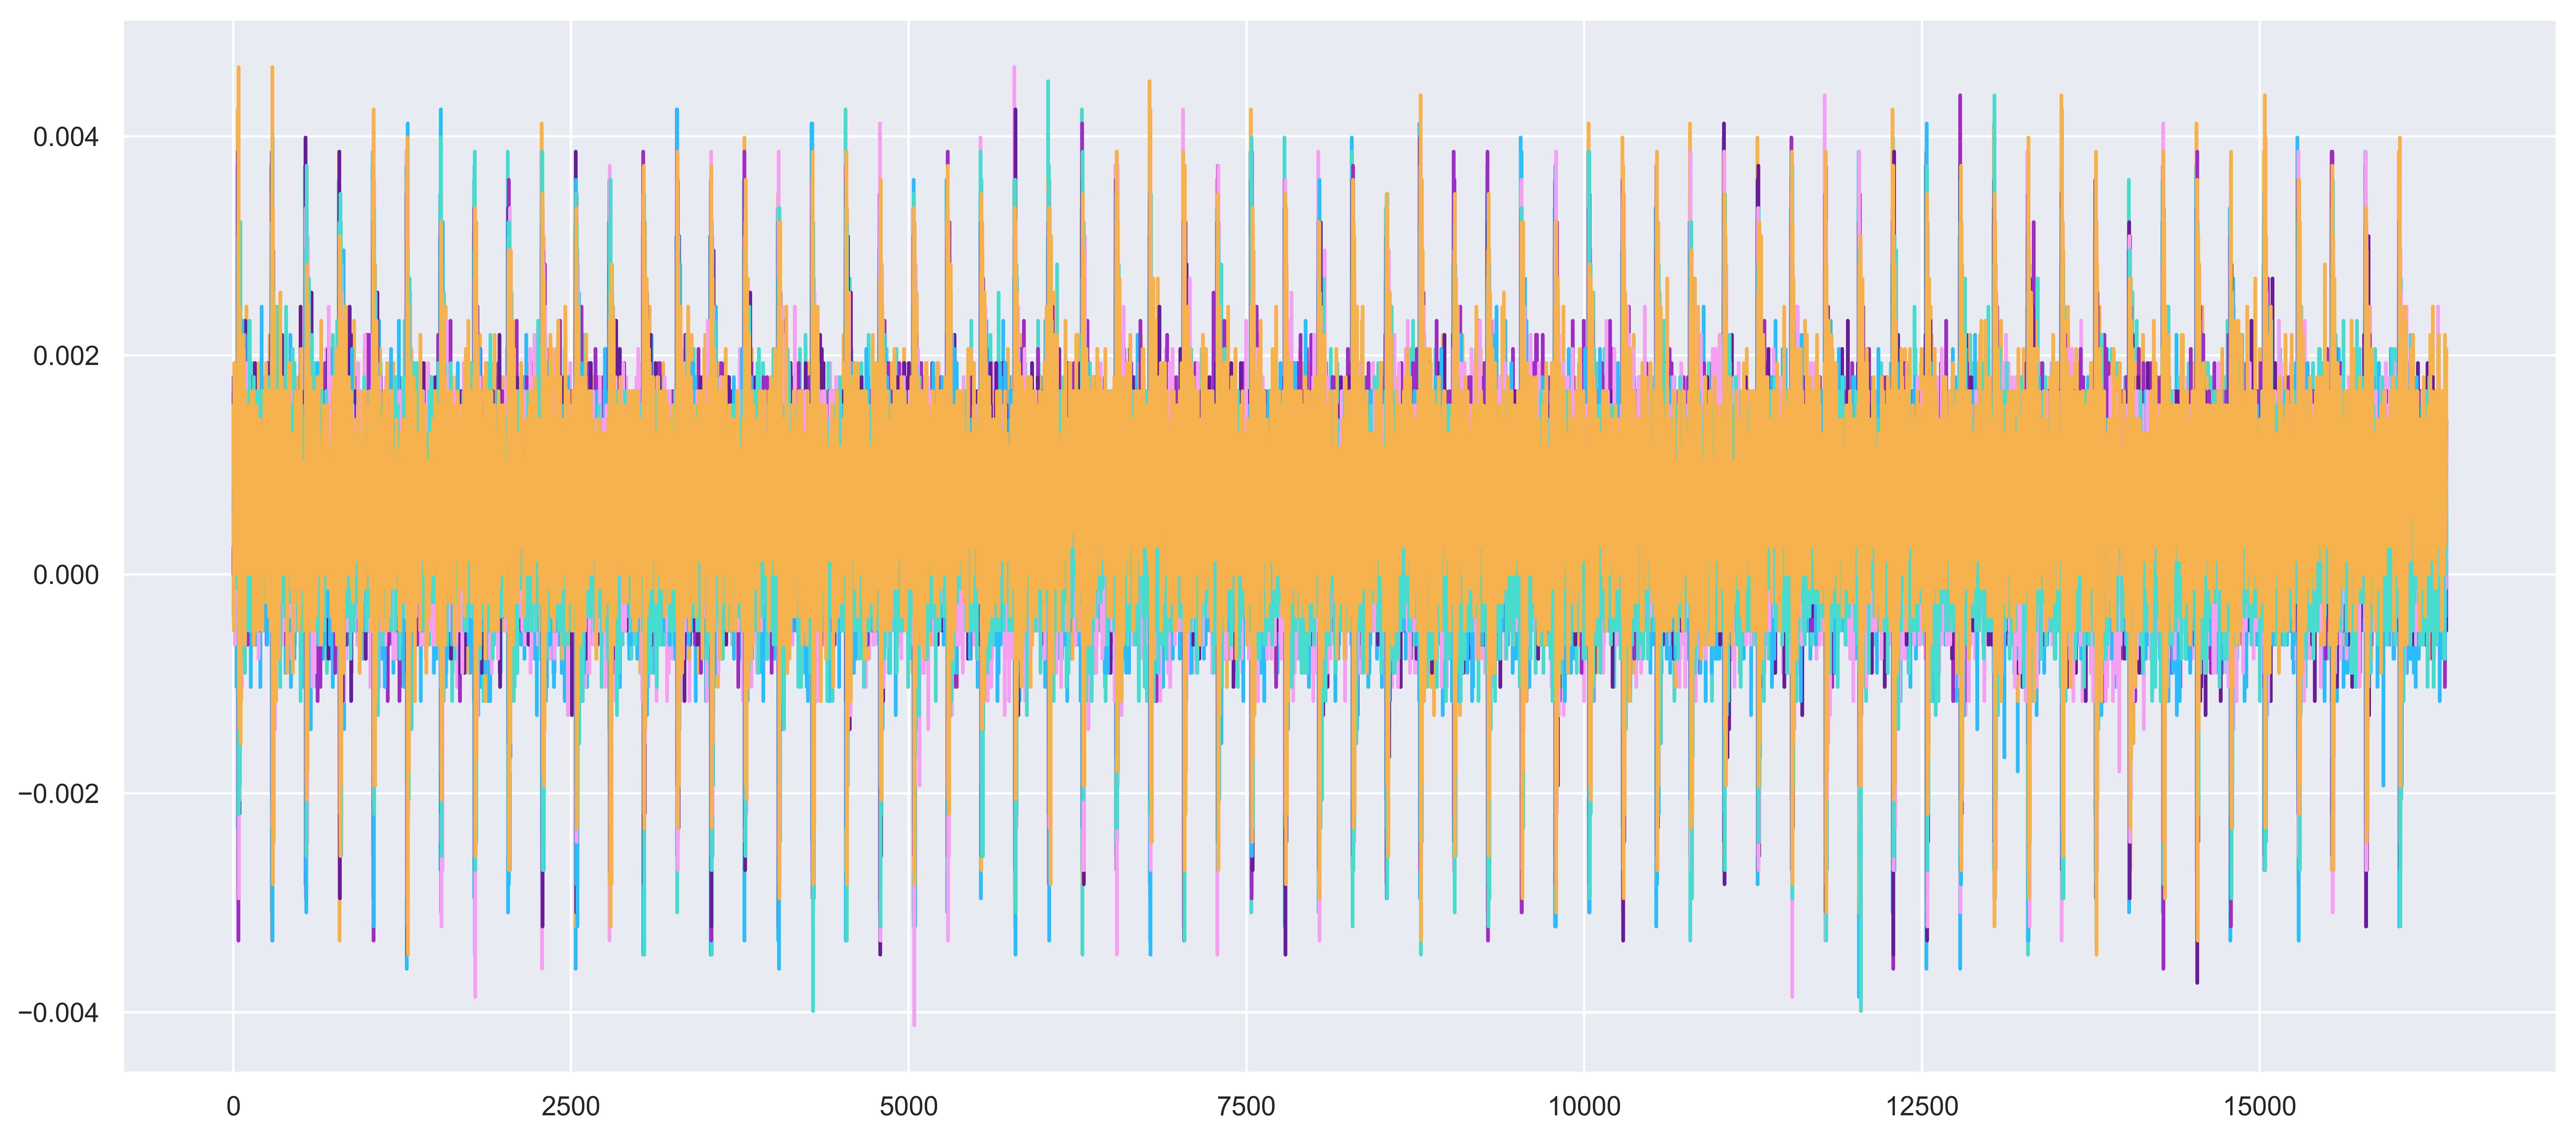

In [3]:
plt.figure(figsize=(18,8), dpi=600)
n = 150

avg = np.zeros(n)
t = np.arange(0, n*8, 8)

for i in range(10):
    filename = 'scope_data/sluis/high_res_acquisition_using_RP/16ns_step_8ns/RP_sweep_16ns_step_8ns' + str(i) + '.npy'
    data = np.load(filename)
    avg[i] = np.average(data)
    plt.plot(data)
    
# plt.plot(t, avg*1e3, marker='o', ls='--')
#plt.xlim(left=0, right=200)